<link rel="stylesheet" href="stylesheet.css">

<body>


  <h1 class="title">Project 5</h1>
  <div class="container">
    <ul class="ul1">
      <li class="li_content">Task 1 : Explain why spectral density is asymmetrical. </li>
      <li class="li_content">Task 2 : Plot the auto-covariance for t and t+L direction.</li>
      <!-- <ul class="ul2">
        <li class="sub_content">subtask 1 : print sampling frequency ⟶ 500 Hz</li>
        <li class="sub_content">subtask 2 : neuron activity frequency ⟶ by fast Fourier transform (FFT) </li>
        <li class="sub_content">subtask 3 : print data_length[second, minute]</li>
      </ul> -->
      <li class="li_content">Task 3 : change the value of the nfft from 500 to 250,20. and plot the spectrograms of each of them</li>
      <!-- <li class="li_content">Task 4 : get time start and time stop and calculate ⟶ [mean, standard deviation]</li>
      <li class="li_content">Task 5 : calculate statistical value and save dataset in CSV file </li> -->
    </ul>
  </div>
</body>



<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:white; height:85px; font-size:45px; font-weight:bold; test-justify:center; background-color:darkblue;border-radius:2px ;padding-top:20px;">Read data</h1>

In [1]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# import libraries :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
# for fourier transform
from numpy.fft import fft, rfft
# to plot spectrogram
from scipy.signal import spectrogram

# to fetch dataset : 
import os
import requests

from numpy import where, arange



In [2]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# download dataset 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

github_username = 'darkrams98'
repo_name = 'Brain_Wave_Analysis_python'
file_name = 'EEG_P2090.mat'
url = f'https://github.com/{github_username}/{repo_name}/raw/main/Project_Datasets/{file_name}'



# مسیر محل ذخیره فایل در سیستم
save_directory = 'Dataset'  # نام پوشه
save_path = os.path.join(save_directory, file_name)

# بررسی وجود پوشه و ایجاد آن اگر وجود نداشته باشد
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# بررسی وجود فایل
if not os.path.exists(save_path):
    # اگر فایل وجود نداشته باشد، دانلود کنید
    response = requests.get(url)
    with open(save_path, 'wb') as file:
        file.write(response.content)
    if response.status_code == 200:
        print('The download was successful !')
    else:
        print('An error occurred while downloading !', response.status_code)
else:
    print('The file already exists !')


The file already exists !


In [3]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# Load dataset :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# read data 
eeg_data = loadmat(save_path)
# print keys :
print(eeg_data.keys())

# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# extract main data :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

eeg_data = eeg_data['EEG_P2090_processed']

# print the information of signals
num_channel  = eeg_data.shape[0]
num_samples = eeg_data.shape [1]
print(f'Number of Channels is {num_channel}.')
print(f'Number of samples {num_samples}')

# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# extract selected channel to plot spectrum or (Power spectral density)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

channel_labels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'C3', 'Cz', 'Cp6', 'Cp2', 'Oz','Cp5', 'Cp1', 'T8', 'Fcz', 'T7', 'Fc6', 'Fc2', 'Fc1', 'Fc5', 'O2', 'O1','P8', 'P4', 'Pz', 'P3', 'P7', 'C4']

# convert to data frame : 
eeg_data_df = pd.DataFrame(eeg_data , index=channel_labels)

# # get head : 
# eeg_data_df.head(10)

# extract by channel number : 
selected_channel = 0 

ext_eeg = eeg_data_df.iloc[selected_channel, :]
print(ext_eeg.shape)
ext_eeg.head()

dict_keys(['__header__', '__version__', '__globals__', 'EEG_P2090_processed'])
Number of Channels is 29.
Number of samples 150310
(150310,)


0    0.080990
1    0.386717
2    0.854558
3    1.369273
4    1.775364
Name: Fp1, dtype: float64

In [4]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# Identify important variables for selected channel 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# n_trial : 
n_trial = len(ext_eeg)
# print(n_trial)

# sampling frequency : (method_1)
sampling_frequency = 500
# sampling frequency : (method_2)
time_range = np.arange(0, n_trial) / sampling_frequency
time_range
delta_t = time_range[1] - time_range[0]
sampling_frequency = 1 / delta_t

print("sampling frequency : " , sampling_frequency)
print("sampling time : ", int(delta_t*10**3), " ms ")
print(time_range)
print(delta_t)

sampling frequency :  500.0
sampling time :  2  ms 
[0.00000e+00 2.00000e-03 4.00000e-03 ... 3.00614e+02 3.00616e+02
 3.00618e+02]
0.002


In [44]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# convert data to numpy array : and print some information
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

eeg_np = np.array(ext_eeg)
print(np.shape(eeg_np))

print("sampling direction (second) : ", np.max(time_range))
print("sampling direction (minute) : ", int(np.max(time_range) / 60))

(150310,)
sampling direction (second) :  300.618
sampling direction (minute) :  5


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:white; height:85px; font-size:45px; font-weight:bold; test-justify:center; background-color:darkblue;border-radius:2px ;padding-top:20px;">Task 1 : Plot Spectrum</h1>

In [6]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot spectrum of whole range : 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# تعداد نقاط در FFT باید توسط 2 بر توانی باشد (برای بهینه‌سازی محاسبات)
n_fft = 2 ** int(np.log2(n_trial))

# calculate fft : 
signal_freq = fft(eeg_np - np.mean(eeg_np), n=n_fft)
print(np.shape(signal_freq))

# Complex Conjugate of fft result : 
freq_conjugate = signal_freq.conj()
print(np.shape(freq_conjugate))

# print 5 row of data 
print(pd.DataFrame(signal_freq).head(5))
print(pd.DataFrame(freq_conjugate).head(5))

(131072,)
(131072,)
                      0
0  -6.638870+ 0.000000j
1 -38.912801- 0.276747j
2 -38.917689- 0.553511j
3 -38.925841- 0.830308j
4 -38.937259- 1.107155j
                      0
0  -6.638870- 0.000000j
1 -38.912801+ 0.276747j
2 -38.917689+ 0.553511j
3 -38.925841+ 0.830308j
4 -38.937259+ 1.107155j


<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4945/363988961.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Power [$\mu V^2$/Hz]')
/home/alireza/anaconda3/envs/brainWave/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/alireza/anaconda3/envs/brainWave/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


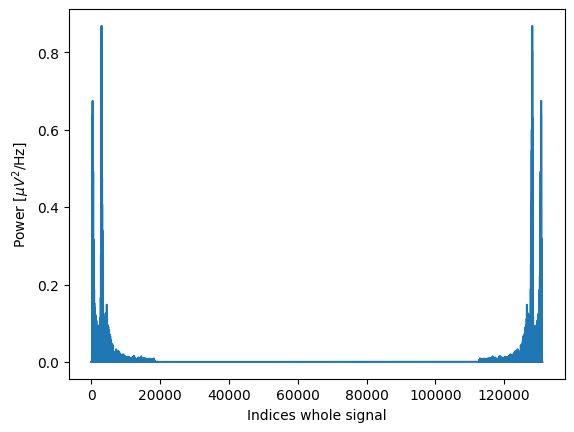

In [7]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot positive and absolute of negative (power VS Time)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

Sxx=  2 * delta_t **2 / time_range[-1] *(signal_freq * freq_conjugate)

# plot
plt.xlabel(f'Indices whole signal')
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.plot(Sxx)

# save fig : 
plt.savefig(f"./Plots/Spectrum_whole_signal_channel{selected_channel}.png")


In [8]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# extract selected range of data : 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# range of data : 
select_range = [0, 2000]

# extract selected range : 
eeg_range = eeg_np[select_range[0]:select_range[1]]


print(np.shape(eeg_range))

print(eeg_range)


(2000,)
[ 0.08099003  0.38671721  0.85455762 ... -0.86717405 -1.02894794
 -1.10163411]


<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4945/407633081.py:20: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Power [$\mu V^2$/Hz]')


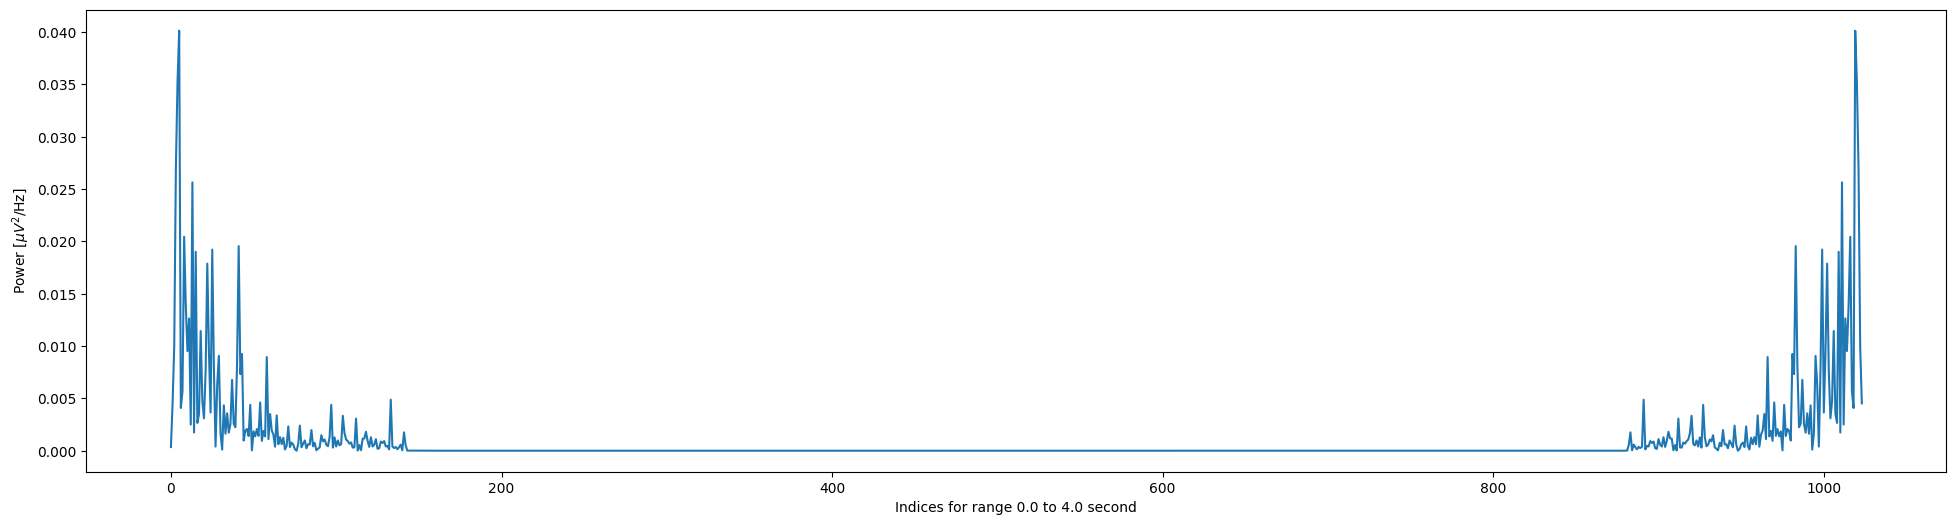

In [9]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate fourier transform and plot spectrum
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

plt.figure(figsize=(24 , 6))

# تعداد نقاط در FFT باید توسط 2 بر توانی باشد (برای بهینه‌سازی محاسبات)
n_fft = 2 ** int(np.log2(len(eeg_range)))

# calculate direction of extracted range : 
time_direction = len(eeg_range) * delta_t

# calculate fft for selected range : 
eeg_range_fft = fft(eeg_range - np.mean(eeg_range), n=n_fft)

# calculate Complex Conjugate of fft result : 
Sxx = (2 * delta_t ** 2 / time_direction * eeg_range_fft * eeg_range_fft.conj()).real
plt.plot(Sxx)
plt.xlabel(f'Indices for range {select_range[0] * delta_t} to {select_range[1]* delta_t} second')
plt.ylabel('Power [$\mu V^2$/Hz]')
# save fig : 
plt.savefig(f"./Plots/Spectrum_of_{selected_channel}_channel_range_of_{select_range[0] * delta_t} to {select_range[1]* delta_t}.png")

In [10]:
print((n_fft))
print(time_direction)
print(np.shape(eeg_range_fft))
print(eeg_range_fft)
print(np.shape(Sxx))

1024
4.0
(1024,)
[ 13.25467222 +0.j         -44.90024785-15.64306403j
 -70.45951049 +3.74143111j ...  60.57493792-99.1724461j
 -70.45951049 -3.74143111j -44.90024785+15.64306403j]
(1024,)


<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4945/1419380235.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Power [$\mu V^2$/Hz]')


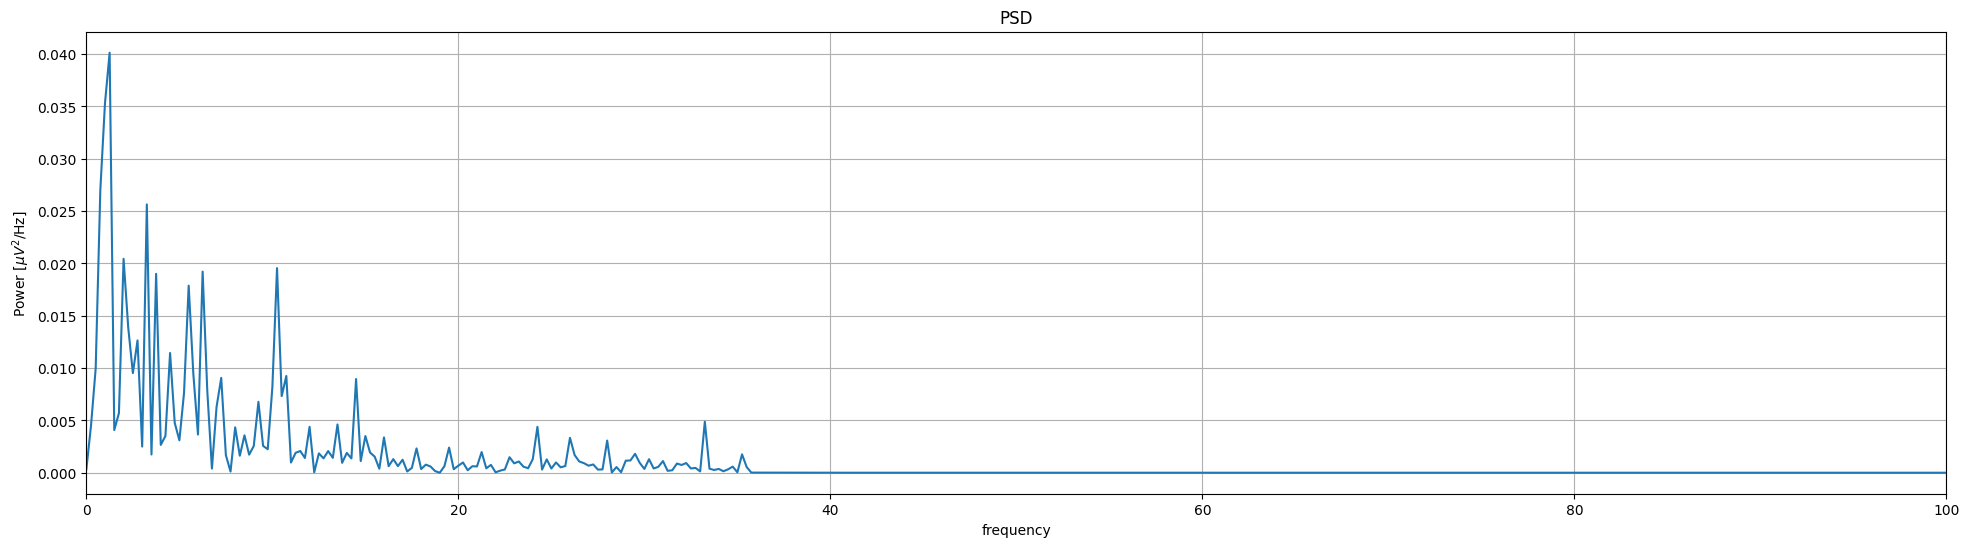

In [11]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot PSD for selected range : 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

plt.figure(figsize=(24 , 6))

# select half of data that is symmetrical : 
Sxx_pos = Sxx [: int(len(eeg_range_fft)/2)]
df = 1 / time_direction
faxis = arange(len(Sxx_pos)) * df


plt.plot(faxis,Sxx_pos)
plt.title("PSD")
plt.xlim([0, len(eeg_range_fft)/2])
plt.grid(True)
plt.xlim([0,100])
plt.xlabel('frequency')
plt.ylabel('Power [$\mu V^2$/Hz]')
# save fig : 
plt.savefig(f"./Plots/PSD_of_{selected_channel}_channel_range_of_{select_range[0] * delta_t} to {select_range[1]* delta_t}.png")

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4945/1482837807.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Power [$\mu V^2$/Hz]')


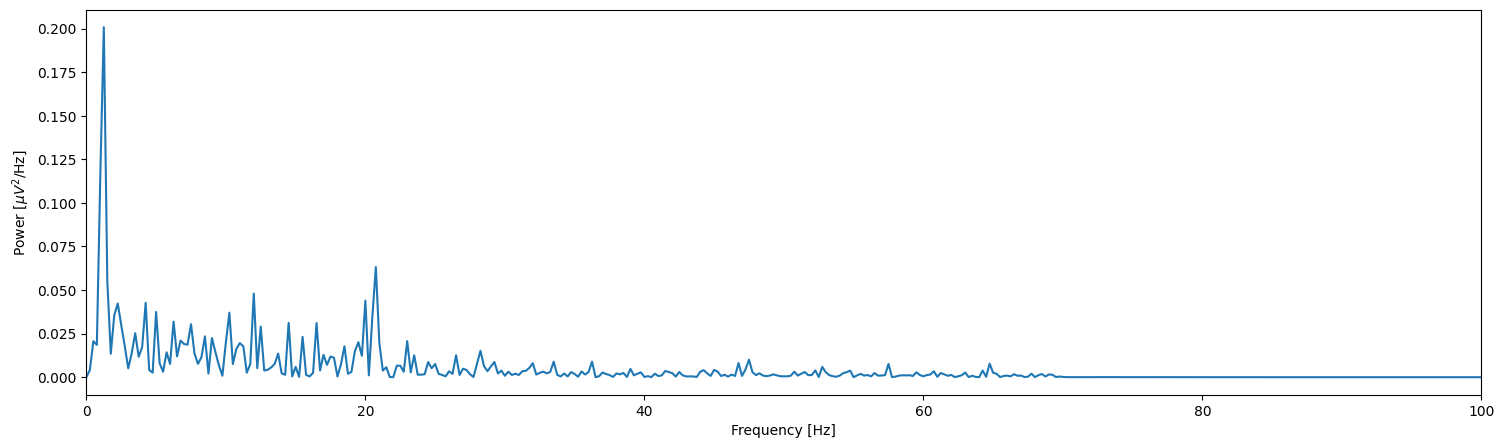

In [41]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot spectrum for positive power . 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

plt.figure(figsize=(18 , 5))

xf = fft(eeg_range - eeg_range.mean())                            # Compute Fourier transform of x
Sxx = 2 * delta_t ** 2 / time_direction * (xf * np.conj(xf))      # Compute spectrum
Sxx = Sxx[:int(len(eeg_range) / 2)]                               # Ignore negative frequencies

df = 1 / time_direction.max()                                     # Determine frequency resolution
fNQ = 1 / delta_t / 2                                             # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)                                       # Construct frequency axis

plt.plot(faxis, Sxx.real)                                         # Plot spectrum vs frequency
plt.title("PSD")
plt.xlim([0, 100])                                                # Select frequency range
plt.xlabel('Frequency [Hz]')                                      # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4945/3742997431.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Power [$\mu V^2$/Hz]')


Text(0, 0.5, 'Power [$\\mu V^2$/Hz]')

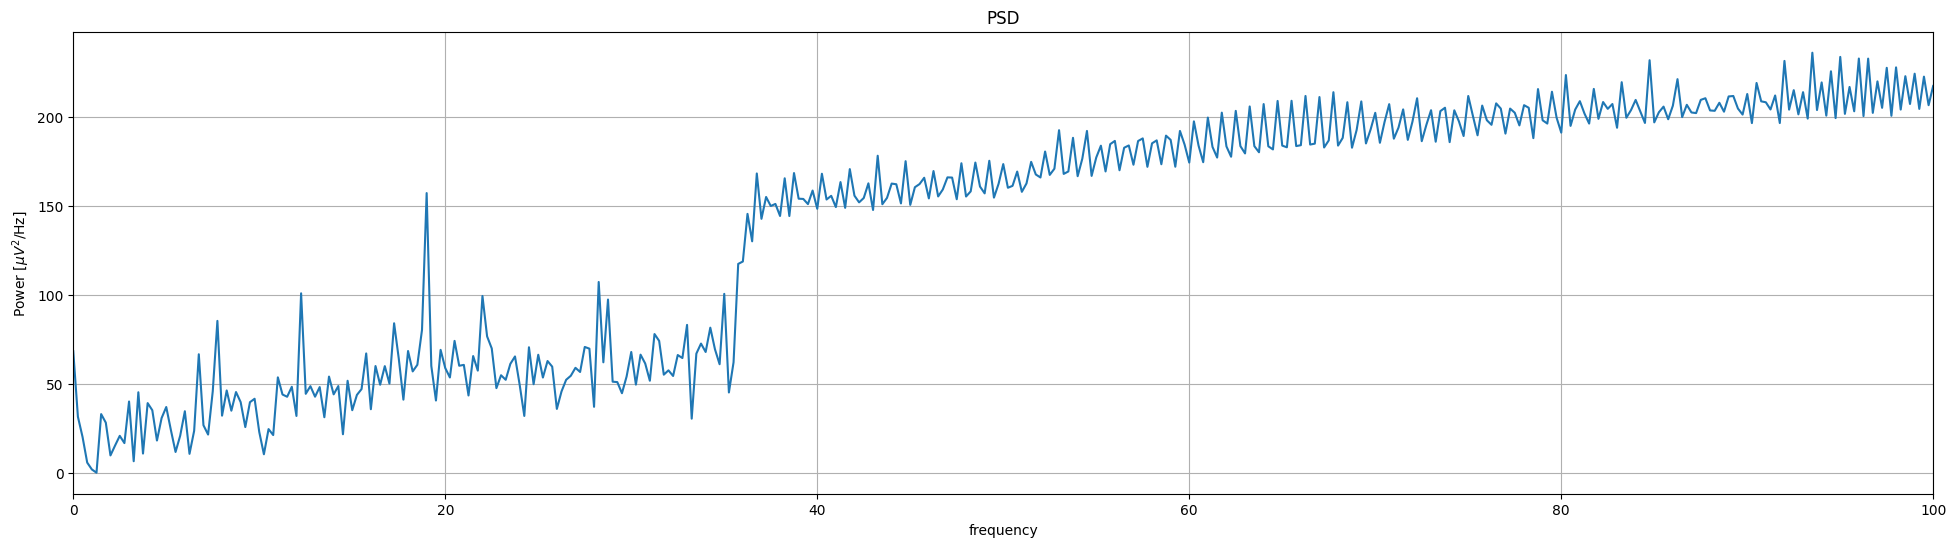

In [42]:

plt.figure(figsize=(24 , 6))

df = 1 / time_direction
faxis = arange(len(Sxx_pos)) * df


plt.plot(faxis,-10 * np.log2(Sxx_pos / max(Sxx_pos)))
plt.title("PSD")
plt.xlim([0, len(eeg_range_fft)/2])
plt.grid(True)
plt.xlim([0,100])
plt.xlabel('frequency')
plt.ylabel('Power [$\mu V^2$/Hz]')
# save fig : 

0
0.0
128.0
1
128.0
256.0
2
256.0
384.0
3
384.0
512.0


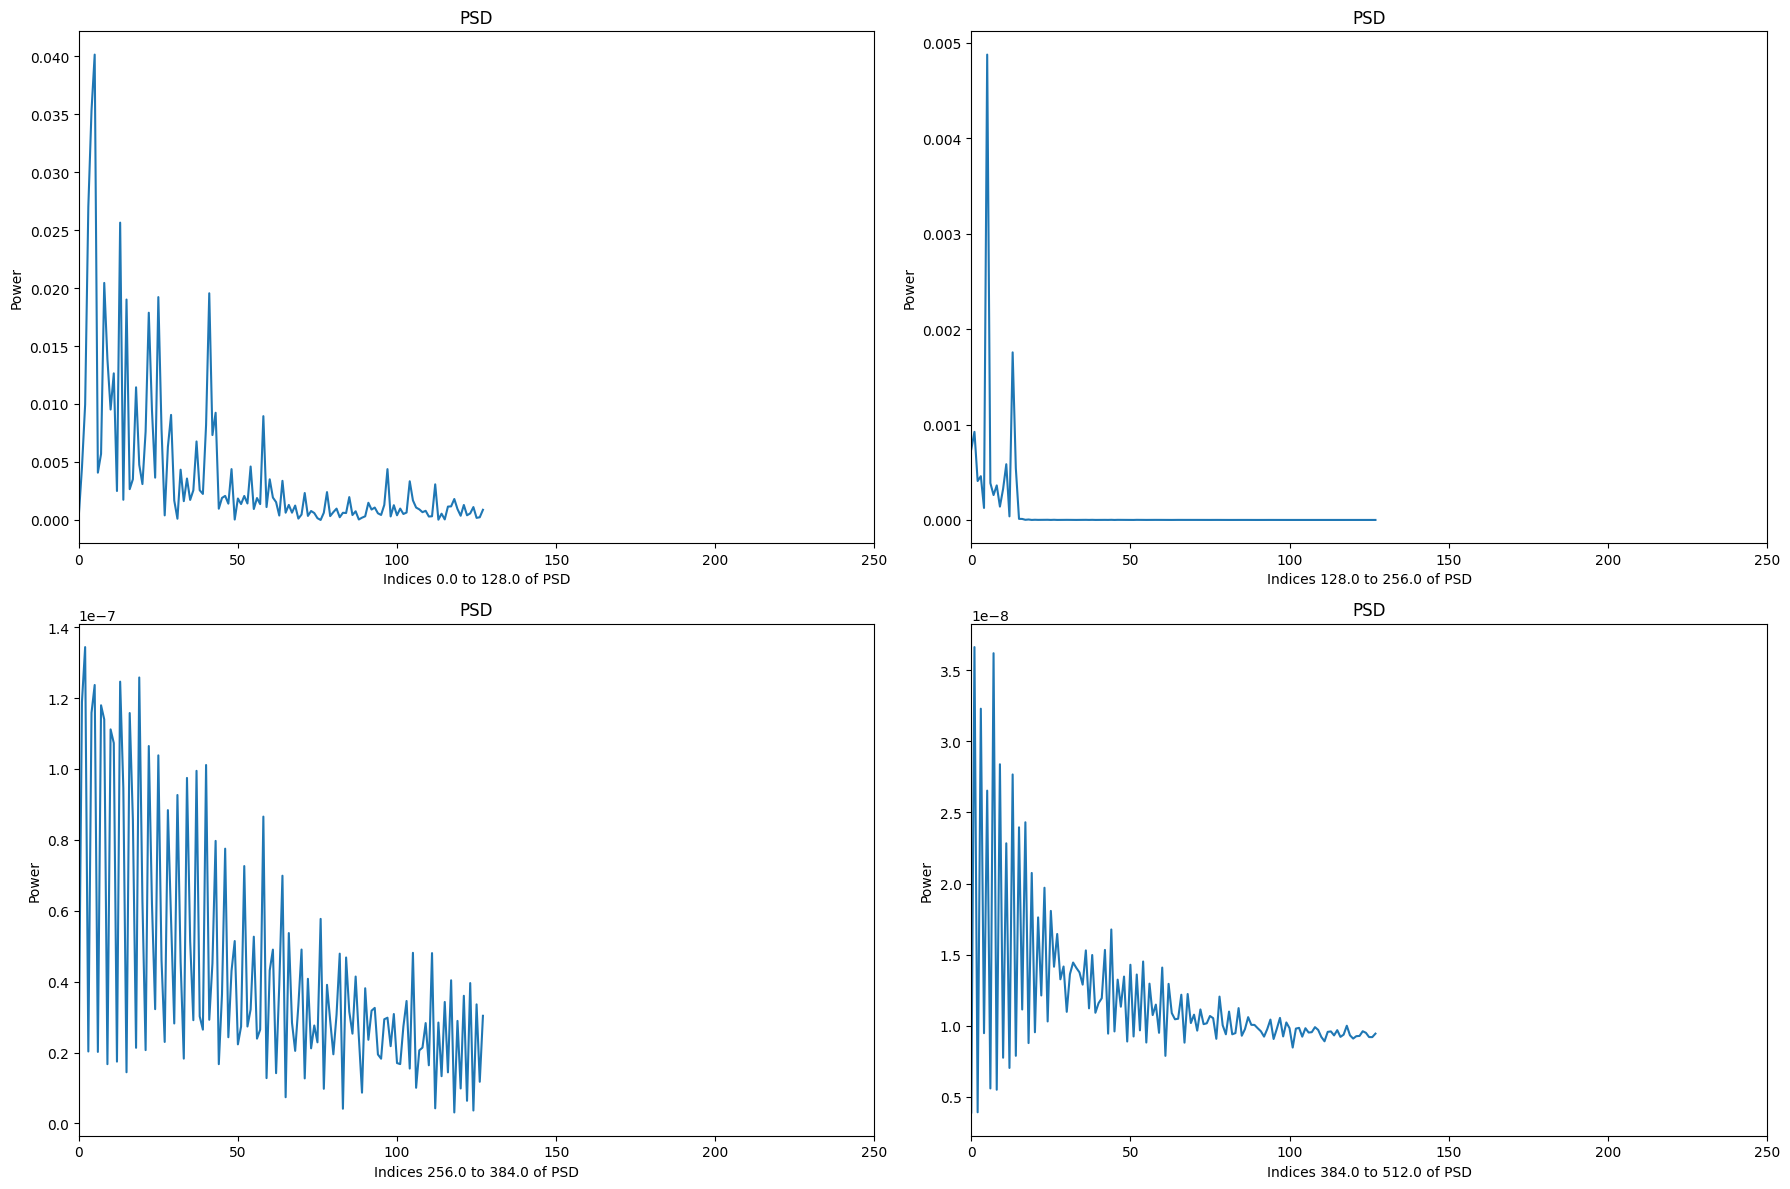

In [16]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot all PSD in sub plot : 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

number_of_subplot = len(eeg_range_fft) / ( len(eeg_range_fft) / 4 )
plt.figure(figsize=(18 , 12))
num_rows = 2
num_cols = 2

plot_num = 0
while plot_num <= int(number_of_subplot) + 1:
    if(plot_num == 4) : 
        break
    plt.subplot(num_rows , num_cols, int(plot_num + 1))
    start_indx = plot_num * (len(Sxx_pos) / number_of_subplot)
    end_indx = (plot_num + 1) * (len(Sxx_pos) / number_of_subplot)
    print(plot_num)
    print(start_indx)
    print(end_indx)
    plt.plot(Sxx_pos[int(start_indx):int(end_indx)])
    plt.title("PSD")
    plt.xlabel(f'Indices {start_indx} to {end_indx} of PSD')
    plt.xlim(0,250)

    plt.ylabel('Power')
    plot_num = plot_num + 1


plt.tight_layout()
plt.show()

<link rel="stylesheet" href="stylesheet.css">

<div><p class="Exp">
چرا نمودار توان فرکانس دارای تقارن است ؟ <br>
به دلیل این که نیمه مثبت فرکانس رسم می‌شود . و در سیگنال های EEG اطلاعات داخل نیمه منفی تقارنی از نیمه مثبت آن است . 
و چون توان قدر مطلق فرکانس را نمایش داده ایم باعث ایجاد شکل متقارن شده است . 
</p></div>


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:white; height:85px; font-size:45px; font-weight:bold; test-justify:center; background-color:darkblue;border-radius:2px ;padding-top:20px;">Task 2 : auto-covariance</h1>

In [17]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# extract selected range of data : 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# range of data : 
select_range = [0, 2000]

# extract selected range : 
eeg_range = eeg_np[select_range[0]:select_range[1]]

# calculate direction of extracted range : 
time_direction = len(eeg_range) * delta_t

print(np.shape(eeg_range))
print(type(time_direction))
print(eeg_range)
print(time_direction)

(2000,)
<class 'numpy.float64'>
[ 0.08099003  0.38671721  0.85455762 ... -0.86717405 -1.02894794
 -1.10163411]
4.0


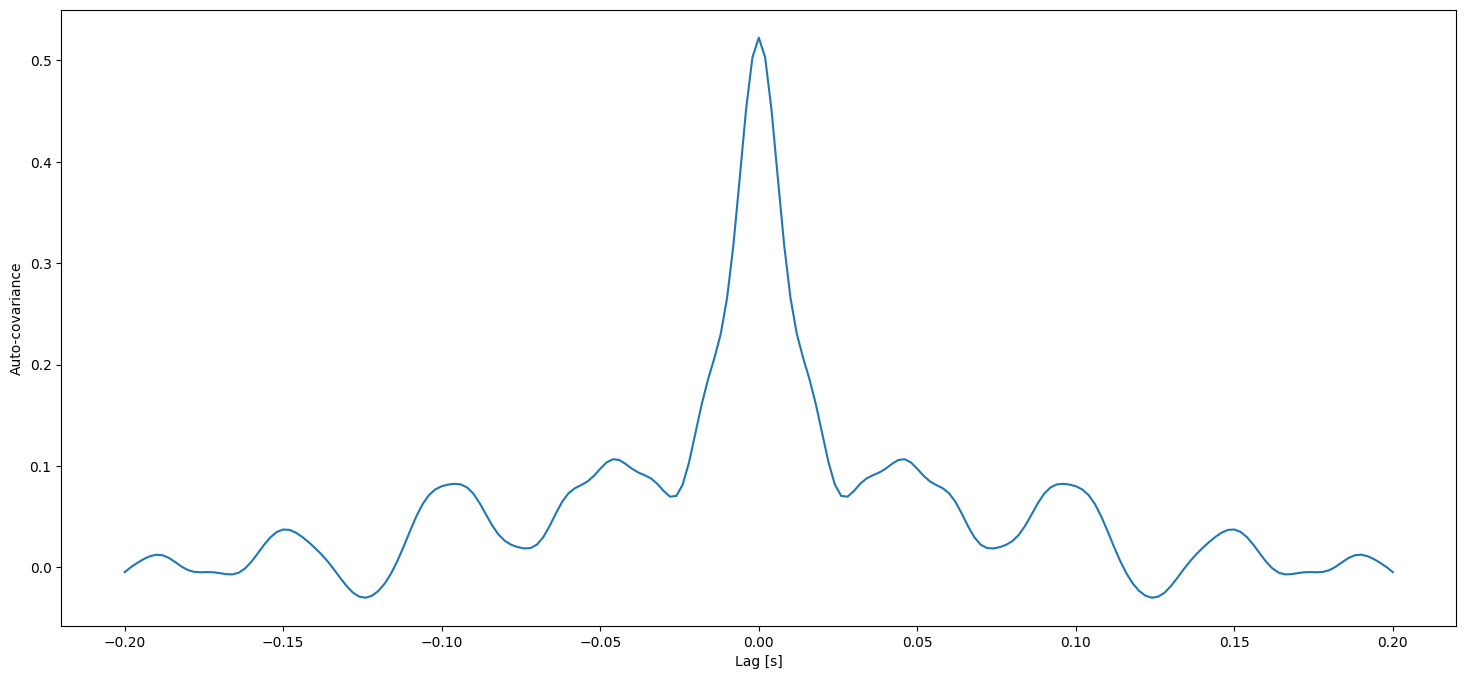

In [30]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate auto-covariance
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
plt.figure(figsize=(18 , 8))

lags = np.arange(-len(eeg_range) + 1, len(eeg_range))    # Compute the lags for the full auto-covariance vector
                                      # ... and the autocov for L +/- 100 indices
ac = 1 / len(eeg_range) * np.correlate(eeg_range - eeg_range.mean(), eeg_range - eeg_range.mean(), mode='full')
inds = abs(lags) <= 100               # Find the lags that are within 100 time steps
plt.plot(lags[inds] * delta_t, ac[inds])       # ... and plot them
plt.xlabel('Lag [s]')                     # ... with axes labelled

plt.ylabel('Auto-covariance')
# savefig('Plots/3-4a')
plt.show()

Text(0.5, 1.0, 'Original time series data, and shifted by amount L\nAutocovariance = 0.5223')

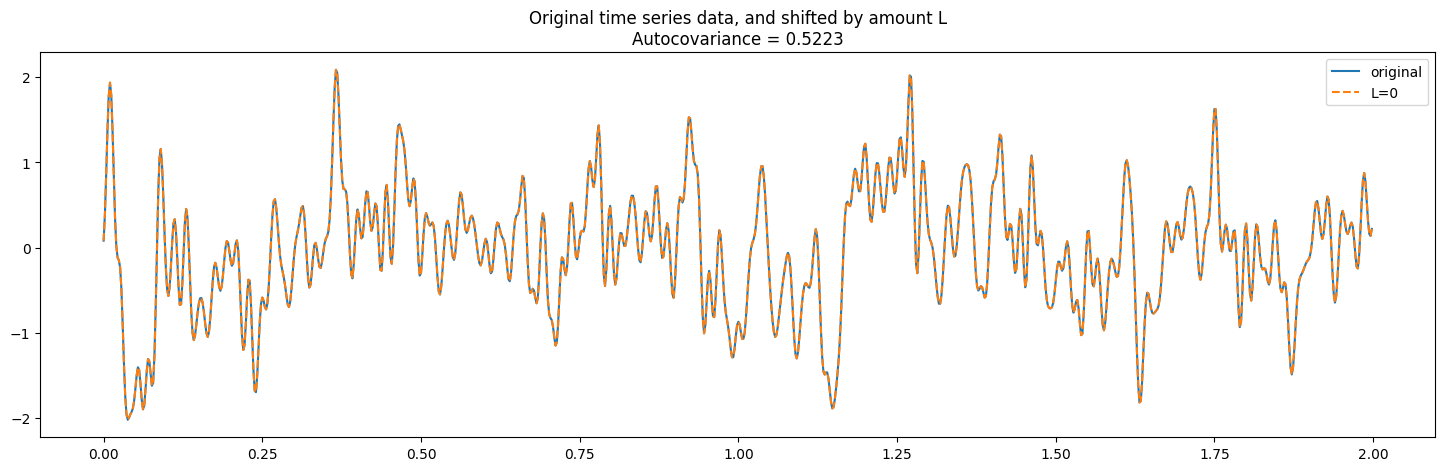

In [19]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# show auto-covariance for (L = 0)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

plt.figure(figsize=(18 , 5))

inds = range(1000)          # Choose a subset of the data to plot
plt.plot(time_range[inds], eeg_np[inds], label="original");   # Plot the original
L=0;                       # Choose the lag,
                           # ... and plot the shifted traces.
plt.plot(time_range[inds], eeg_np[[i + L for i in inds]], '--',
     label="L={}".format(L))
plt.legend(loc='upper right')  # Add a legend and informative title
plt.title("Original time series data, and shifted by amount L\nAutocovariance = {:.4}".format(ac[lags==L][0]))

In [20]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# print auto-covariance for L = 0
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

b=ac[lags == 0]
print(b)

[0.52232803]


Text(0.5, 1.0, 'Original time series data, and shifted by amount L\nAutocovariance = 0.0825')

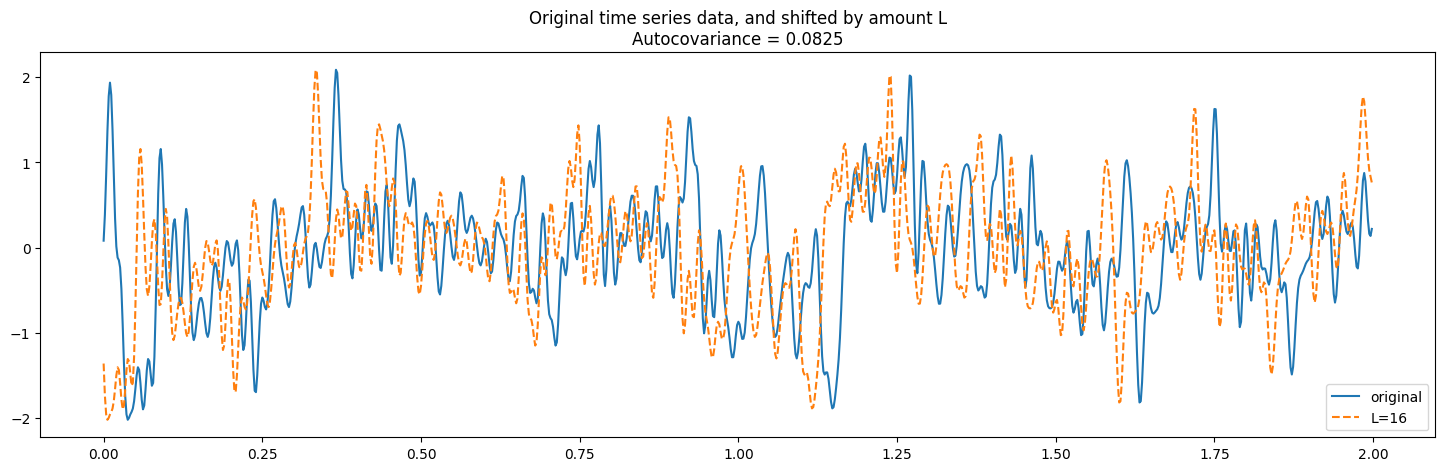

In [21]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot and calculate auto-covariance for (60 Hz)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

plt.figure(figsize=(18 , 5))

plt.plot(time_range[inds], eeg_np[inds], label="original");       # Plot the original
L=int(2*1/60/delta_t);                               # Choose the lag,

                                                # ... and plot the shifted traces.
plt.plot(time_range[inds], eeg_np[[i + L for i in inds]], '--', 
     label="L={}".format(L))
plt.legend()                                        # Add a legend and informative title
plt.title("Original time series data, and shifted by amount L\nAutocovariance = {:.4}".format(ac[lags==L][0]))

In [22]:
ac[where(lags == L)]

array([0.08249524])

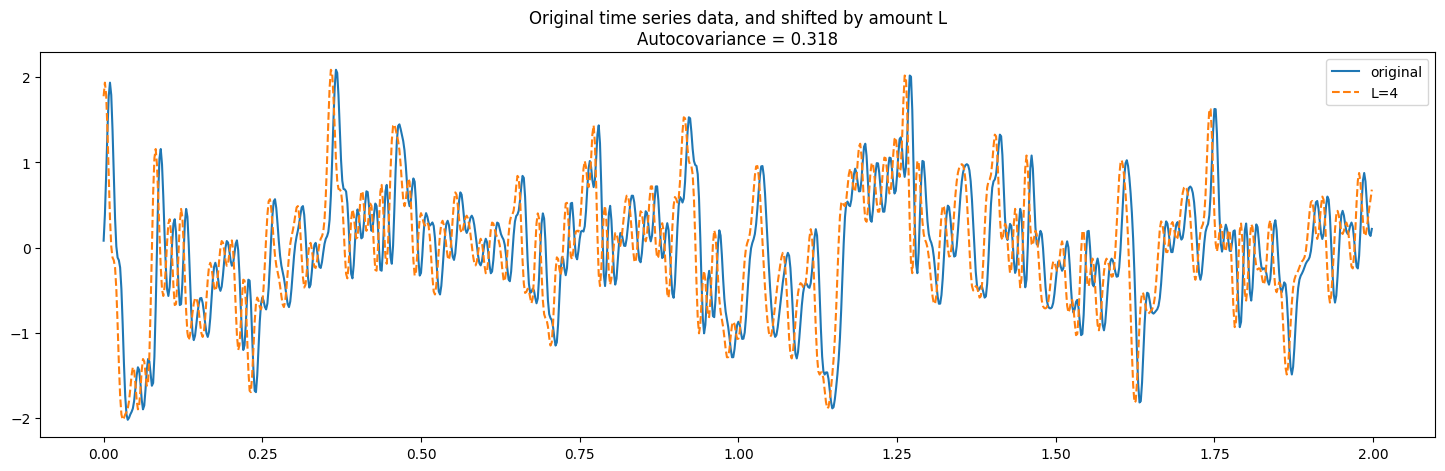

In [23]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# show and calculate auto-covariance for L = 4
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

plt.figure(figsize=(18 , 5))

plt.plot(time_range[inds], eeg_np[inds], label="original");       # Plot the original
L=int(1/2*1/60/delta_t);                             # Choose the lag,
                                                # ... and plot the shifted traces.
plt.plot(time_range[inds], eeg_np[[i + L for i in inds]], '--', 
     label="L={}".format(L))
plt.legend()                                        # Add a legend and informative title
plt.title("Original time series data, and shifted by amount L\nAutocovariance = {:.4}".format(ac[lags==L][0]));

Text(0, 0.5, 'Autocovariance')

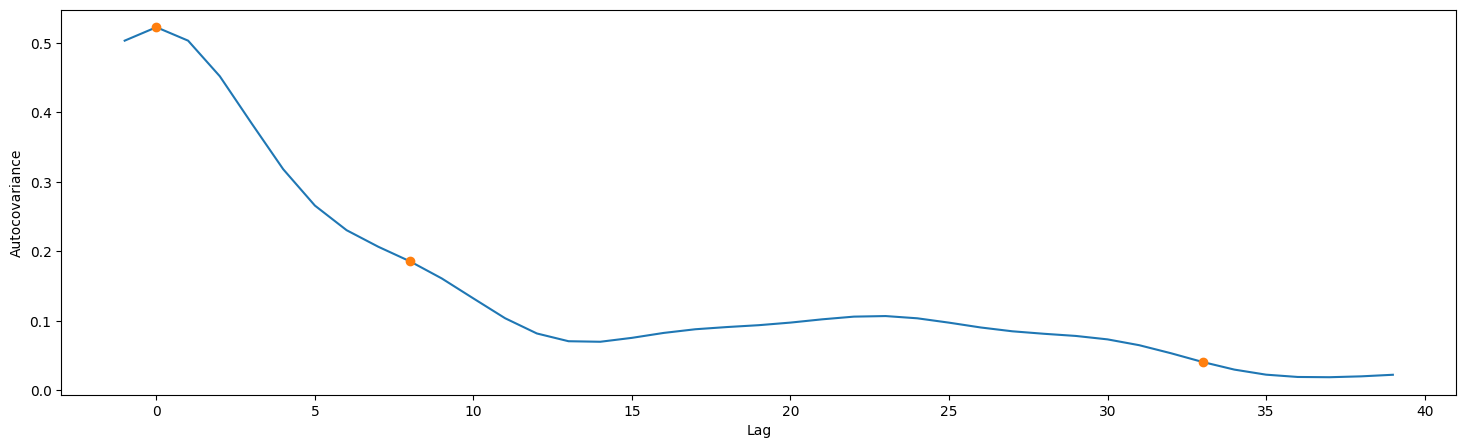

In [24]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot (auto-covariance VS Lags) in 60 Hz frequency . 
# Plot the autocovariance again, highlighting lags at 3 different shifts in the 60 Hz cycle
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

plt.figure(figsize=(18 , 5))

inds = [l in range(-1, 40) for l in lags]        # Get the lags in a limited range
plt.plot(lags[inds], ac[inds])                       # ... and plot the autocovariance,
L = [0, 33, 8]                                   # Consider three specific lags
plt.plot(sorted(L), ac[[l in L for l in lags]], 'o') # ... and highlight them
plt.xlabel('Lag')                                    # Label the axes.
plt.ylabel('Autocovariance')

<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:white; height:85px; font-size:45px; font-weight:bold; test-justify:center; background-color:darkblue;border-radius:2px ;padding-top:20px;">Task 3 : spectrograms</h1>

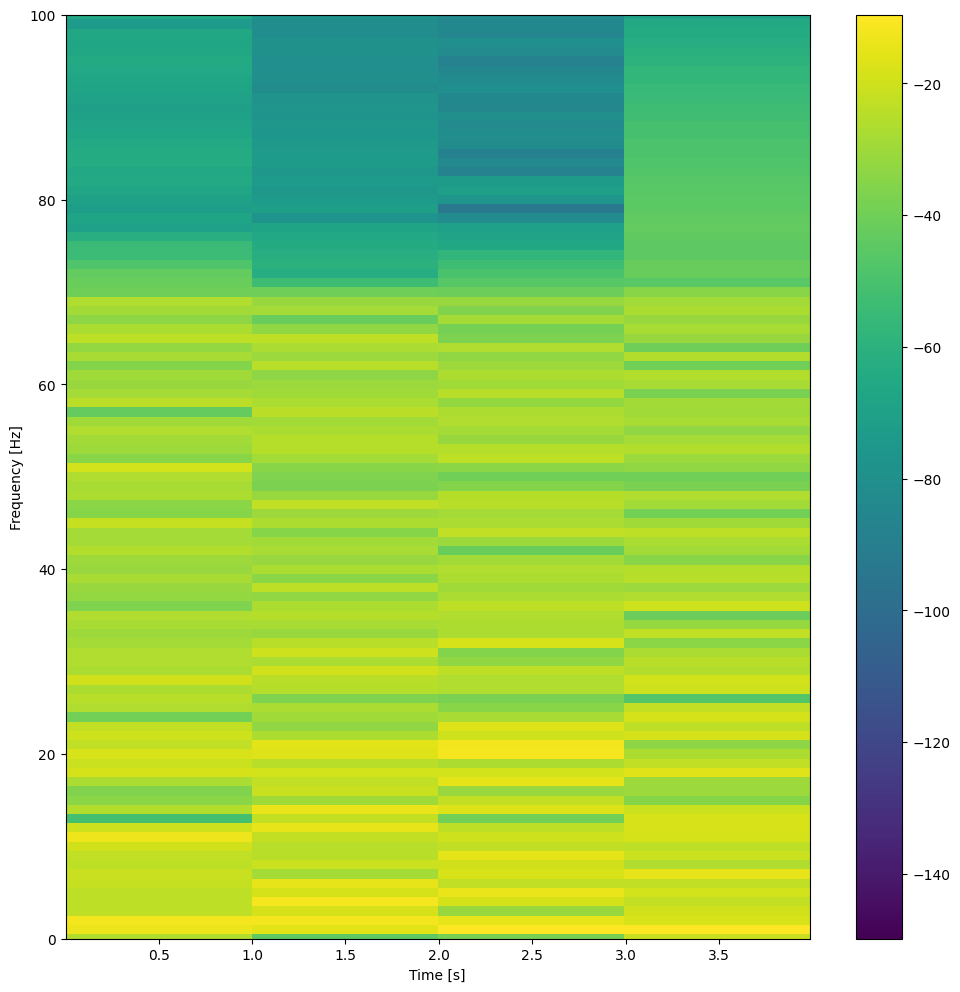

In [37]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot spectrograms for nfft = 500
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

nfft = 500
overlap = 2
fs = 500
freqs , times, Sxx = spectrogram(eeg_range, fs=fs, nperseg=nfft, noverlap= overlap)

plt.figure(figsize=(12 , 12))
plt.pcolormesh(times, freqs, 10*np.log10(Sxx))
plt.colorbar()                # ... with a color bar,
plt.ylim([0, 100])             # ... set the frequency range,
plt.xlabel('Time [s]')        # ... and label the axes
plt.ylabel('Frequency [Hz]')
plt.show()

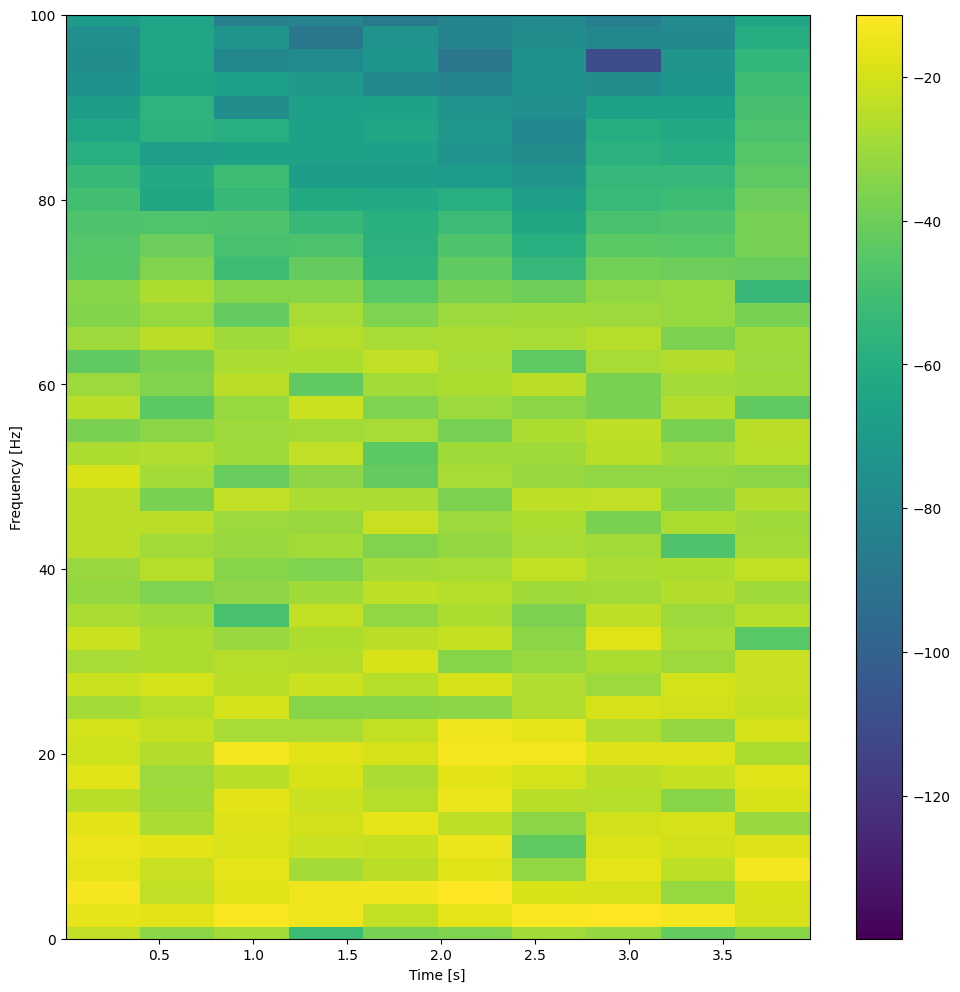

In [38]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot spectrograms for nfft = 200
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

nfft = 200
overlap = 2
fs = 500
freqs , times, Sxx = spectrogram(eeg_range, fs=fs, nperseg=nfft, noverlap= overlap)

plt.figure(figsize=(12 , 12))
plt.pcolormesh(times, freqs, 10*np.log10(Sxx))
plt.colorbar()                # ... with a color bar,
plt.ylim([0, 100])             # ... set the frequency range,
plt.xlabel('Time [s]')        # ... and label the axes
plt.ylabel('Frequency [Hz]')
plt.show()

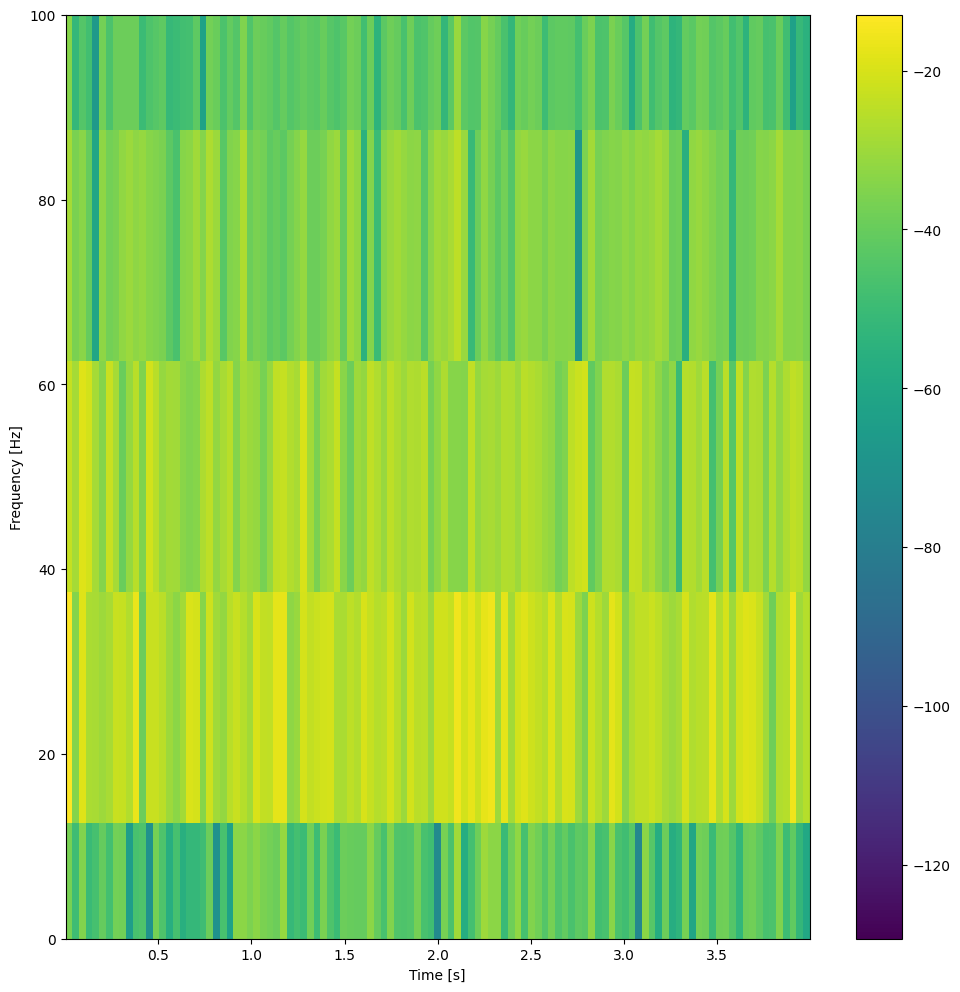

In [39]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot spectrograms for nfft = 20
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

nfft = 20
overlap = 2
fs = 500
freqs , times, Sxx = spectrogram(eeg_range, fs=fs, nperseg=nfft, noverlap= overlap)

plt.figure(figsize=(12 , 12))
plt.pcolormesh(times, freqs, 10*np.log10(Sxx))
plt.colorbar()                # ... with a color bar,
plt.ylim([0, 100])             # ... set the frequency range,
plt.xlabel('Time [s]')        # ... and label the axes
plt.ylabel('Frequency [Hz]')
plt.show()